<a href="https://colab.research.google.com/github/Dharshini13002/Machine-learning-codes/blob/main/6)linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: /content/drive/MyDrive/yahoo_data[1].xlsx linear regression fot this path

!pip install openpyxl

import pandas as pd
import statsmodels.api as sm

# Load the dataset
file_path = '/content/drive/MyDrive/yahoo_data[1].xlsx'
df = pd.read_excel(file_path)

# Assuming the data has columns named 'X' (predictor) and 'Y' (response)
# You might need to adjust these column names based on your actual data
# Let's use the first column as X and the second column as Y for this example
# Replace 'Column1' and 'Column2' with your actual column names

# Exclude the 'Date' column and select the remaining columns as predictors
X = df.drop(columns=['Date'])
y = df.iloc[:, 1]  # Assuming the second column is the response, which is 'Open' based on the df variable

# Add a constant to the predictor variable for the intercept
X = sm.add_constant(X)

# Create and fit the OLS model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Open   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.202e+23
Date:                Fri, 18 Jul 2025   Prob (F-statistic):               0.00
Time:                        04:42:14   Log-Likelihood:                 18859.
No. Observations:                1258   AIC:                        -3.771e+04
Df Residuals:                    1252   BIC:                        -3.768e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.218e-07   1.82e-08     -6.678      

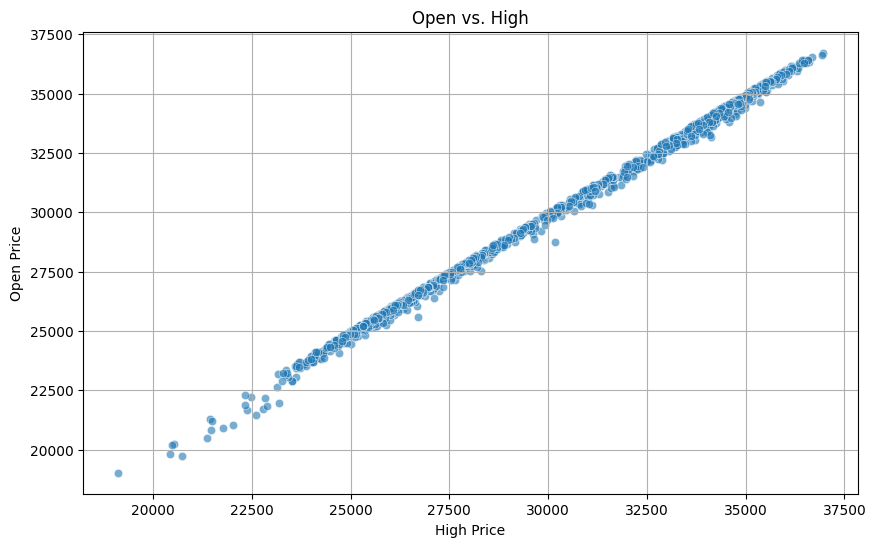

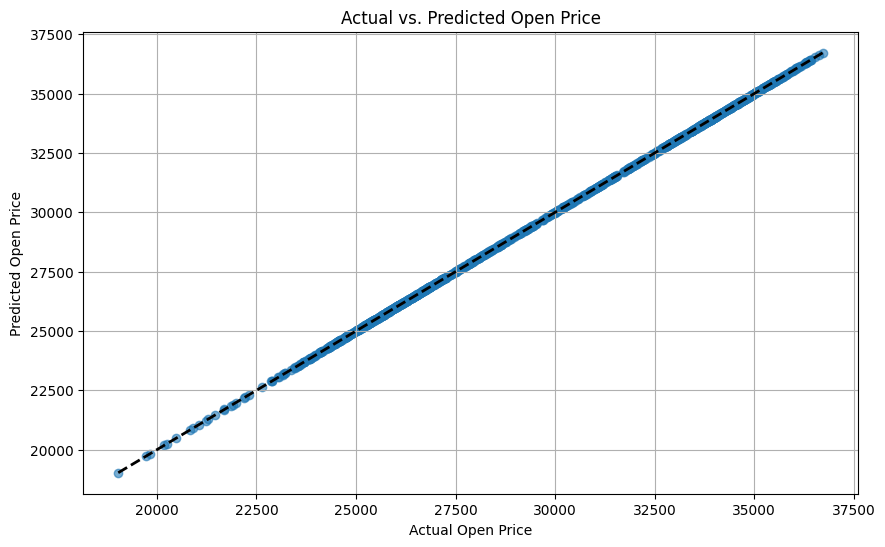

In [ ]:

if 'High' in X.columns:
    import matplotlib.pyplot as plt
    import seaborn as sns


    X_no_const = X.drop(columns=['const'])

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X_no_const['High'], y=y, alpha=0.6)
    plt.title('Open vs. High')
    plt.xlabel('High Price')
    plt.ylabel('Open Price')
    plt.grid(True)


    plt.figure(figsize=(10, 6))
    plt.scatter(y, model.predict(X), alpha=0.6)
    plt.xlabel('Actual Open Price')
    plt.ylabel('Predicted Open Price')
    plt.title('Actual vs. Predicted Open Price')
    plt.grid(True)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Add ideal line
    plt.show()
else:
    print("The column 'High' was not found in the predictor variables.")



Linear Regression Results for Anscombe's Quartet - Set I:
                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.96
Date:                Fri, 18 Jul 2025   Prob (F-statistic):            0.00218
Time:                        04:59:44   Log-Likelihood:                -16.854
No. Observations:                  11   AIC:                             37.71
Df Residuals:                       9   BIC:                             38.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


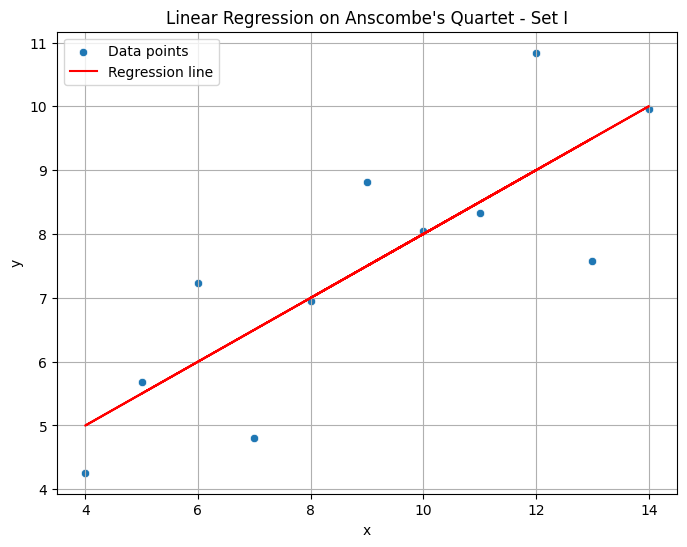

In [ ]:
# prompt: /content/sample_data/anscombe.json for this code give me linear regression

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Anscombe's quartet dataset
# Note: The provided file path in the original code was for an Excel file.
# This code loads the Anscombe's quartet JSON file from sample_data.
df_anscombe = pd.read_json('/content/sample_data/anscombe.json')

# The Anscombe dataset is structured in a way that requires selecting specific parts for regression.
# Let's focus on the first dataset (set I) which is common for linear regression examples.
# You can adjust this to use other sets (II, III, IV) if needed.
df_set1 = df_anscombe[df_anscombe['Series'] == 'I']

# Define the predictor (X) and response (y) variables for set I
X_set1 = df_set1['X']
y_set1 = df_set1['Y']

# Add a constant to the predictor variable for the intercept
X_set1 = sm.add_constant(X_set1)

# Create and fit the OLS model
model_set1 = sm.OLS(y_set1, X_set1).fit()

# Print the regression summary for set I
print("Linear Regression Results for Anscombe's Quartet - Set I:")
print(model_set1.summary())

# Plot the data and the regression line for set I
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_set1['X'], y=df_set1['Y'], label='Data points')
plt.plot(df_set1['X'], model_set1.predict(X_set1), color='red', label='Regression line')
plt.title("Linear Regression on Anscombe's Quartet - Set I")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

Intercept: 2.9975454545454534
Slope: 0.5002727272727274
R-squared: 0.666160328066761
Mean Squared Error: 1.2542174380165287


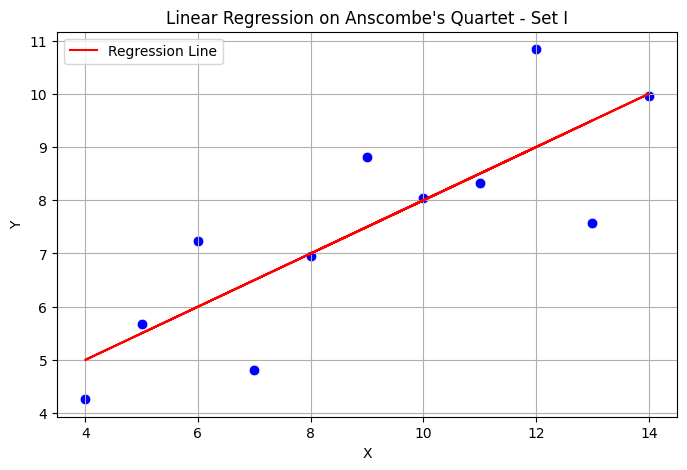

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Anscombe dataset from the built-in Colab path
file_path = '/content/sample_data/anscombe.json'
df = pd.read_json(file_path)

# Optional: Convert to DataFrame if it's nested (depending on structure)
# This is already structured in Anscombe's format in Colab
# anscombe_df = pd.DataFrame(df['data']) # Remove this line

# Filter for Set I
set1 = df[df['Series'] == 'I'] # Use df directly

# Extract X and Y
X = set1[['X']]  # Note: must be 2D for sklearn
y = set1['Y']

# Create and train linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Print model parameters
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R-squared:", r2_score(y, y_pred))
print("Mean Squared Error:", mean_squared_error(y, y_pred))

# Plot regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(data=set1, x='X', y='Y', color='blue', s=60)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Linear Regression on Anscombe's Quartet - Set I")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                     17.96
Date:                Fri, 18 Jul 2025   Prob (F-statistic):            0.00218
Time:                        05:08:19   Log-Likelihood:                -16.854
No. Observations:                  11   AIC:                             37.71
Df Residuals:                       9   BIC:                             38.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9975      1.126      2.662      0.0

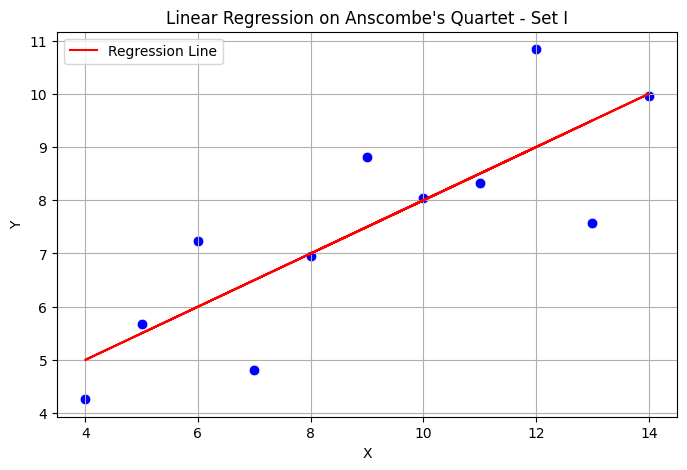

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Anscombe dataset from the built-in Colab path
file_path = '/content/sample_data/anscombe.json'
df = pd.read_json(file_path)

# Optional: Convert to DataFrame if it's nested (depending on structure)
# This is already structured in Anscombe's format in Colab
# anscombe_df = pd.DataFrame(df['data']) # Remove this line

# Filter for Set I
set1 = df[df['Series'] == 'I'] # Use df directly

# Extract X and Y
X = set1[['X']]  # Note: must be 2D for sklearn
y = set1['Y']

# Create and train linear regression model
model = LinearRegression()
model.fit(X, y)


model_set1 = sm.OLS(y_set1, X_set1).fit()

print(model_set1.summary())

# Make predictions
y_pred = model.predict(X)

# Print model parameters
print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])
print("R-squared:", r2_score(y, y_pred))
print("Mean Squared Error:", mean_squared_error(y, y_pred))

# Plot regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(data=set1, x='X', y='Y', color='blue', s=60)
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.title("Linear Regression on Anscombe's Quartet - Set I")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activi

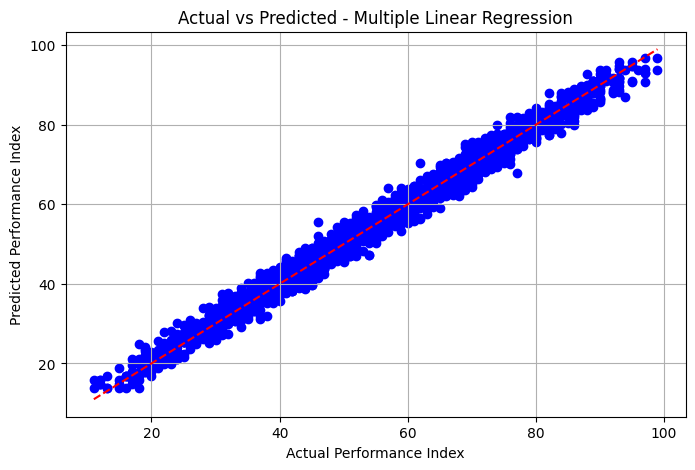

In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load dataset
import pandas as pd
file_path = '/content/drive/MyDrive/Student_Performance.csv'
df = pd.read_csv(file_path)

# Step 3: Inspect dataset
print(df.head())
print(df.columns)

# ⚠️ Step 4: Choose Features and Target
# Replace these with actual column names from your dataset
# For example: study_hours, attendance_rate, etc.
# Target example: final_score
X = df[['Hours Studied', 'Previous Scores']]  # Replace with real feature names
y = df['Performance Index']                  # Replace with your target column

# Step 5: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Train Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Step 7: Predict
y_pred = model.predict(X_test)

# Step 8: Evaluate
from sklearn.metrics import mean_squared_error, r2_score
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

# Step 9: Optional - Plot Actual vs Predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted - Multiple Linear Regression')
plt.grid(True)
plt.show()

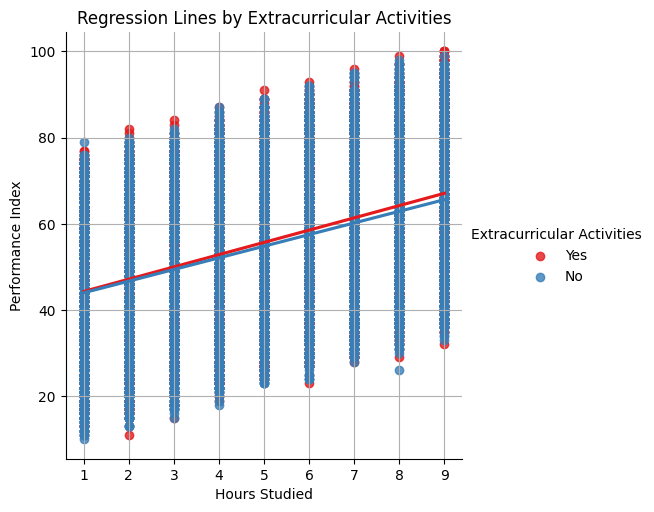

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Load your dataset
file_path = '/content/drive/MyDrive/Student_Performance.csv'
df = pd.read_csv(file_path)

# Example: Plot Performance Index vs Hours Studied for each Extracurricular Activities status
# (Replace with actual column names if different)
sns.lmplot(data=df, x='Hours Studied', y='Performance Index', hue='Extracurricular Activities', ci=None, palette='Set1')
plt.title('Regression Lines by Extracurricular Activities')
plt.grid(True)
plt.show()

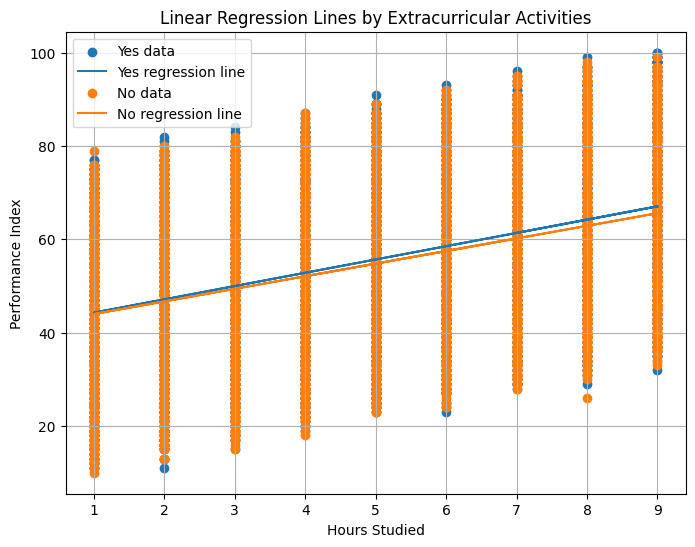

In [ ]:
# Group by Extracurricular Activities (or any category) and plot separate regression lines
categories = df['Extracurricular Activities'].unique()

plt.figure(figsize=(8, 6))

for category in categories:
    subset = df[df['Extracurricular Activities'] == category]
    X = subset[['Hours Studied']]
    y = subset['Performance Index']

    model = LinearRegression()
    model.fit(X, y)
    y_pred = model.predict(X)

    plt.scatter(X, y, label=f"{category} data")
    plt.plot(X, y_pred, label=f"{category} regression line")

plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.title('Linear Regression Lines by Extracurricular Activities')
plt.legend()
plt.grid(True)
plt.show()

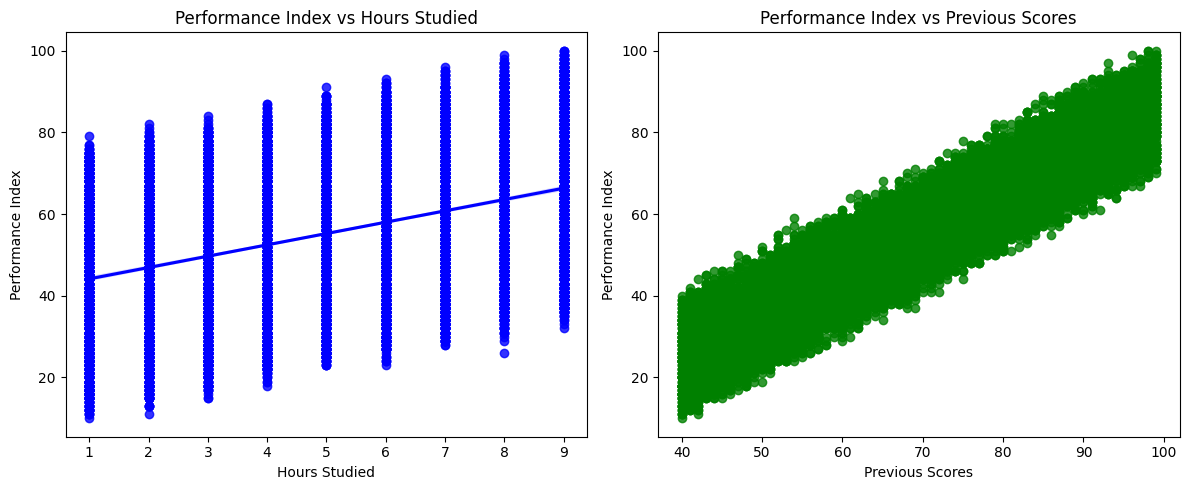

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Study Hours
sns.regplot(data=df, x='Hours Studied', y='Performance Index', ax=axs[0], color='blue')
axs[0].set_title('Performance Index vs Hours Studied')

# Attendance - Assuming 'Previous Scores' is a proxy for attendance or a related factor
# If you have an 'Attendance' column, please replace 'Previous Scores' with the actual column name.
sns.regplot(data=df, x='Previous Scores', y='Performance Index', ax=axs[1], color='green')
axs[1].set_title('Performance Index vs Previous Scores') # Update title to reflect actual column

plt.tight_layout()
plt.show()

   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3              5               52                        Yes            5   
4              7               75                         No            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  
Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

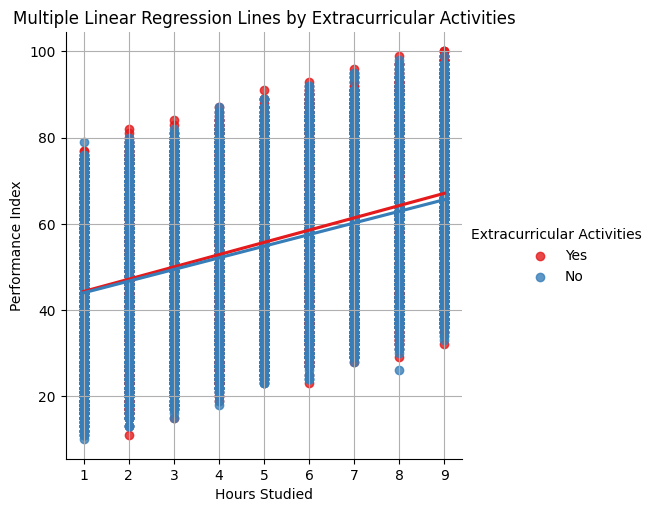

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Step 1: Load your dataset
file_path = '/content/drive/MyDrive/Student_Performance.csv'
df = pd.read_csv(file_path)

# OPTIONAL: Display structure
print(df.head())
print(df.columns)

# Step 2: Encode categorical column if needed (e.g., Gender or Class)
# Assuming 'Class' is the group column (can also be 'Gender')
group_col = 'Extracurricular Activities'  # Change this if needed

# Step 3: Plot Multiple Linear Regression Lines
plt.figure(figsize=(10, 6))
sns.lmplot(data=df, x='Hours Studied', y='Performance Index', hue=group_col, ci=None, palette='Set1')
plt.title('Multiple Linear Regression Lines by Extracurricular Activities')
plt.xlabel('Hours Studied')
plt.ylabel('Performance Index')
plt.grid(True)
plt.show()